In [96]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


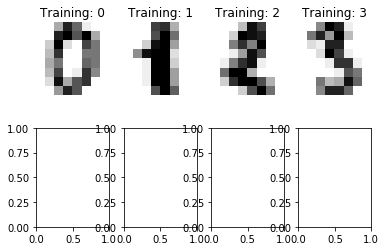

In [2]:
# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.{{}}
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    {ax.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')}
    ax.set_title('Training: %i' % label)


In [42]:
digits.images.reshape

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [21]:
digits.target.shape

(1797,)

In [73]:
type(digits.images)

numpy.ndarray

In [10]:
digits.images[0].shape

(8, 8)

In [11]:
digits.images[1].shape

(8, 8)

In [4]:
digits.target.shape

(1797,)

In [5]:
digits.images[0].size

64

In [6]:
digits.images[0].shape

(8, 8)

In [13]:
len(digits.images)

1797

In [38]:
len(digits.images)

1797

In [33]:
len(digits.images)

1797

In [69]:
digits.images.shape

(1797, 8, 8)

In [71]:
digits.images[0].shape

(8, 8)

In [50]:
data = digits.images.reshape((n_samples, -1))


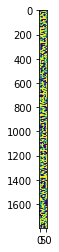

In [54]:
plt.imshow(data)

In [59]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [92]:
[X_test[0]]

[array([ 0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,
        16.,  8.,  0.,  0.,  8., 16.,  4.,  6., 16.,  5.,  0.,  0.,  5.,
        15., 11., 13., 14.,  0.,  0.,  0.,  0.,  2., 12., 16., 13.,  0.,
         0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0., 16.,
        16., 16.,  7.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,  0.])]

In [95]:
classifier.predict([X_test[2]])

array([4])

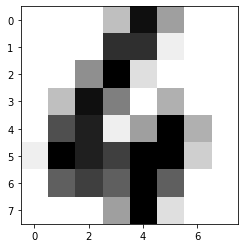

In [78]:
plt.imshow(X_test[2].reshape(8,8), cmap=plt.cm.gray_r,interpolation='nearest')

In [82]:
classifier.predict(X_test)[2]

4

In [88]:
classifier.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
classifier.predict()

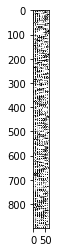

In [67]:
plt.imshow(X_test, cmap=plt.cm.gray_r,interpolation='nearest')

In [8]:
!conda install scikit-learn=0.17


Solving environment: | ^C
failed

CondaError: KeyboardInterrupt



In [ ]:
!conda